<a href="https://colab.research.google.com/github/AnmolSikandar/docs/blob/main/ML_ZOOMCAMP_HOMEWORK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset:

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv


--2024-10-08 14:03:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.03s   

2024-10-08 14:03:44 (10.6 MB/s) - ‘laptops.csv’ saved [298573/298573]



Load the CSV file into a DataFrame: After downloading the file, you can load it using pandas:

In [2]:
import pandas as pd
df = pd.read_csv('laptops.csv')


Normalize the column names:


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


Exploratory Data Analysis (EDA)
Visualize the distribution of final_price: You can use matplotlib to plot the distribution of prices:

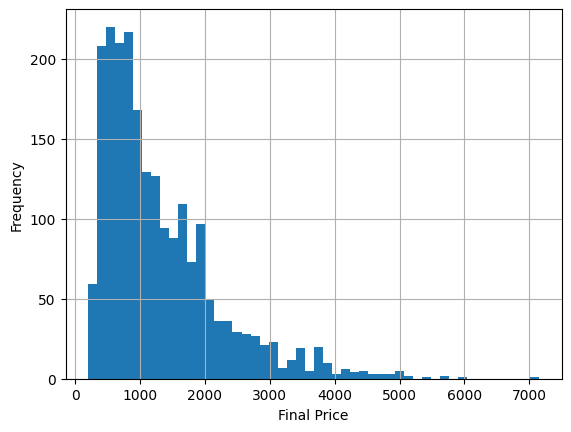

In [7]:
import matplotlib.pyplot as plt
df['final_price'].hist(bins=50)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()


Check for missing values in each column: Question 1





In [8]:
df.isnull().sum()


,0
laptop,0
status,0
brand,0
model,0
cpu,0
ram,0
storage,0
storage_type,42
gpu,1371
screen,4


Median of the ram Column: Question 2

In [9]:
ram_median = df['ram'].median()
print(f"Median of RAM: {ram_median}")


Median of RAM: 16.0


Prepare and Split the Dataset:
Shuffle the dataset using seed 42:

In [11]:
df_filtered = df[['ram', 'storage', 'screen', 'final_price']]
df_filtered = df_filtered.sample(frac=1, random_state=42)


Split the dataset: You can use train_test_split from sklearn to split the dataset:

In [13]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(df_filtered, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)


 Handling Missing Values (Question 3):
 Fill missing values with 0:

In [20]:
df_train_filled_0 = df_train.fillna(0)


Fill missing values with the mean (training data only):

In [21]:
mean_value = df_train.mean()
df_train_filled_mean = df_train.fillna(mean_value)


Train the Linear Regression model: You can train and evaluate your models using LinearRegression from sklearn:

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Model with missing values filled with 0
model_0 = LinearRegression()
model_0.fit(df_train_filled_0[['ram', 'storage', 'screen']], df_train_filled_0['final_price'])
y_pred_val_0 = model_0.predict(df_val.fillna(0)[['ram', 'storage', 'screen']])
rmse_0 = np.sqrt(mean_squared_error(df_val['final_price'], y_pred_val_0))

# Model with missing values filled with mean
model_mean = LinearRegression()
model_mean.fit(df_train_filled_mean[['ram', 'storage', 'screen']], df_train_filled_mean['final_price'])
y_pred_val_mean = model_mean.predict(df_val.fillna(mean_value)[['ram', 'storage', 'screen']])
rmse_mean = np.sqrt(mean_squared_error(df_val['final_price'], y_pred_val_mean))

print(f"RMSE with 0: {round(rmse_0, 2)}")
print(f"RMSE with mean: {round(rmse_mean, 2)}")


RMSE with 0: 675.08
RMSE with mean: 675.16


Regularized Linear Regression (Question 4):
Train Ridge Regression with different values of r:

In [17]:
from sklearn.linear_model import Ridge

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(df_train_filled_0[['ram', 'storage', 'screen']], df_train_filled_0['final_price'])
    y_pred_val_ridge = model_ridge.predict(df_val.fillna(0)[['ram', 'storage', 'screen']])
    rmse_ridge = np.sqrt(mean_squared_error(df_val['final_price'], y_pred_val_ridge))
    print(f"RMSE with r={r}: {round(rmse_ridge, 2)}")


RMSE with r=0: 675.08
RMSE with r=0.01: 675.08
RMSE with r=0.1: 675.08
RMSE with r=1: 675.08
RMSE with r=5: 675.08
RMSE with r=10: 675.08
RMSE with r=100: 675.01


Influence of Seed (Question 5):
Try different seeds and collect RMSE:


In [18]:
rmse_list = []

for seed in range(10):
    df_train, df_temp = train_test_split(df_filtered, test_size=0.4, random_state=seed)
    df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=seed)

    model = LinearRegression()
    model.fit(df_train.fillna(0)[['ram', 'storage', 'screen']], df_train['final_price'])
    y_pred_val = model.predict(df_val.fillna(0)[['ram', 'storage', 'screen']])
    rmse = np.sqrt(mean_squared_error(df_val['final_price'], y_pred_val))
    rmse_list.append(rmse)

std_dev = np.std(rmse_list)
print(f"Standard deviation: {round(std_dev, 3)}")


Standard deviation: 29.442


Final Test with Regularization (Question 6)
Combine the training and validation datasets, then train with r=0.001

In [19]:
df_train_full = pd.concat([df_train, df_val])
model_final = Ridge(alpha=0.001)
model_final.fit(df_train_full.fillna(0)[['ram', 'storage', 'screen']], df_train_full['final_price'])

# Test the model on the test dataset
y_pred_test = model_final.predict(df_test.fillna(0)[['ram', 'storage', 'screen']])
rmse_test = np.sqrt(mean_squared_error(df_test['final_price'], y_pred_test))
print(f"RMSE on test set: {round(rmse_test, 2)}")


RMSE on test set: 537.15
